In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [248]:
iris = load_iris()
X = iris.data[:, [0, 2]]   # sepal length (0) and petal length (2)
y = iris.target

In [249]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               
    test_size=0.2,      
    random_state=42)

In [250]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 2) (30, 2)
(120,) (30,)


In [251]:
dtreeCla = DecisionTreeClassifier(max_depth=None)

dtreeCla.fit(X_train, y_train)

DecisionTreeClassifier()

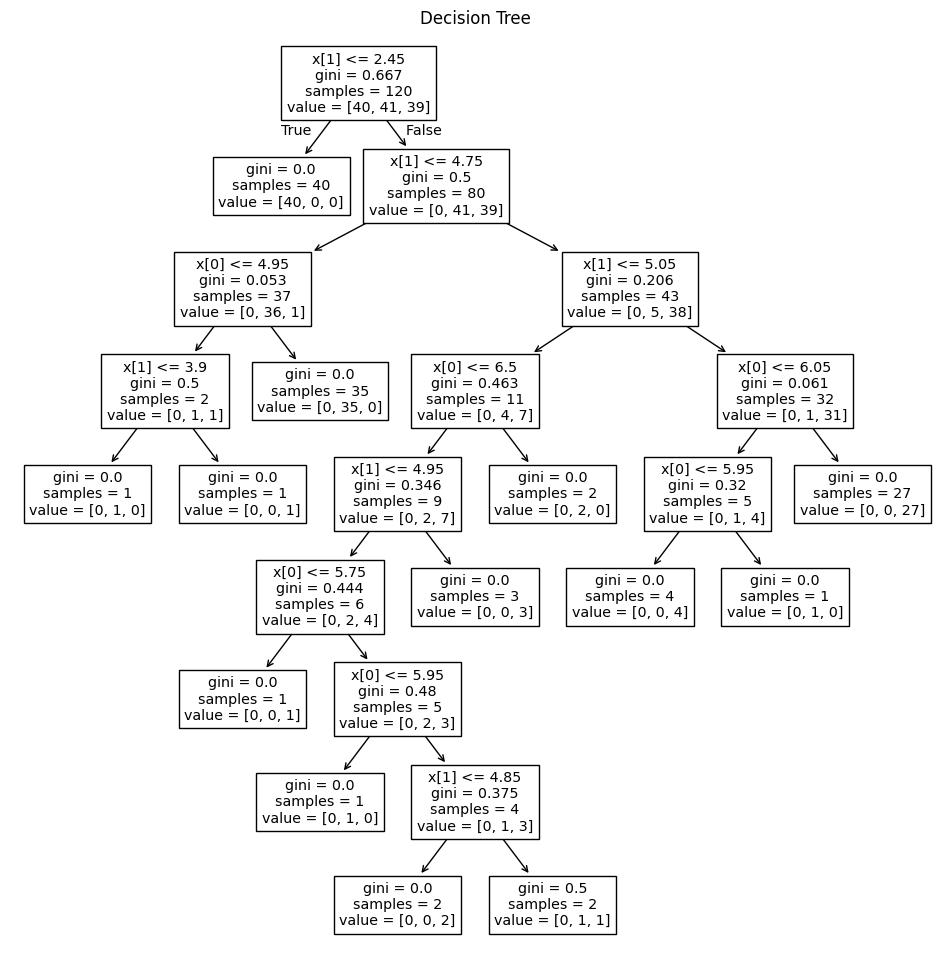

In [252]:
# Ploting decision tree
plt.figure(figsize=(12, 12))
plot_tree(dtreeCla)
plt.title("Decision Tree")
plt.show()

In [253]:
y_pred = dtreeCla.predict(X_test)

In [254]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [255]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

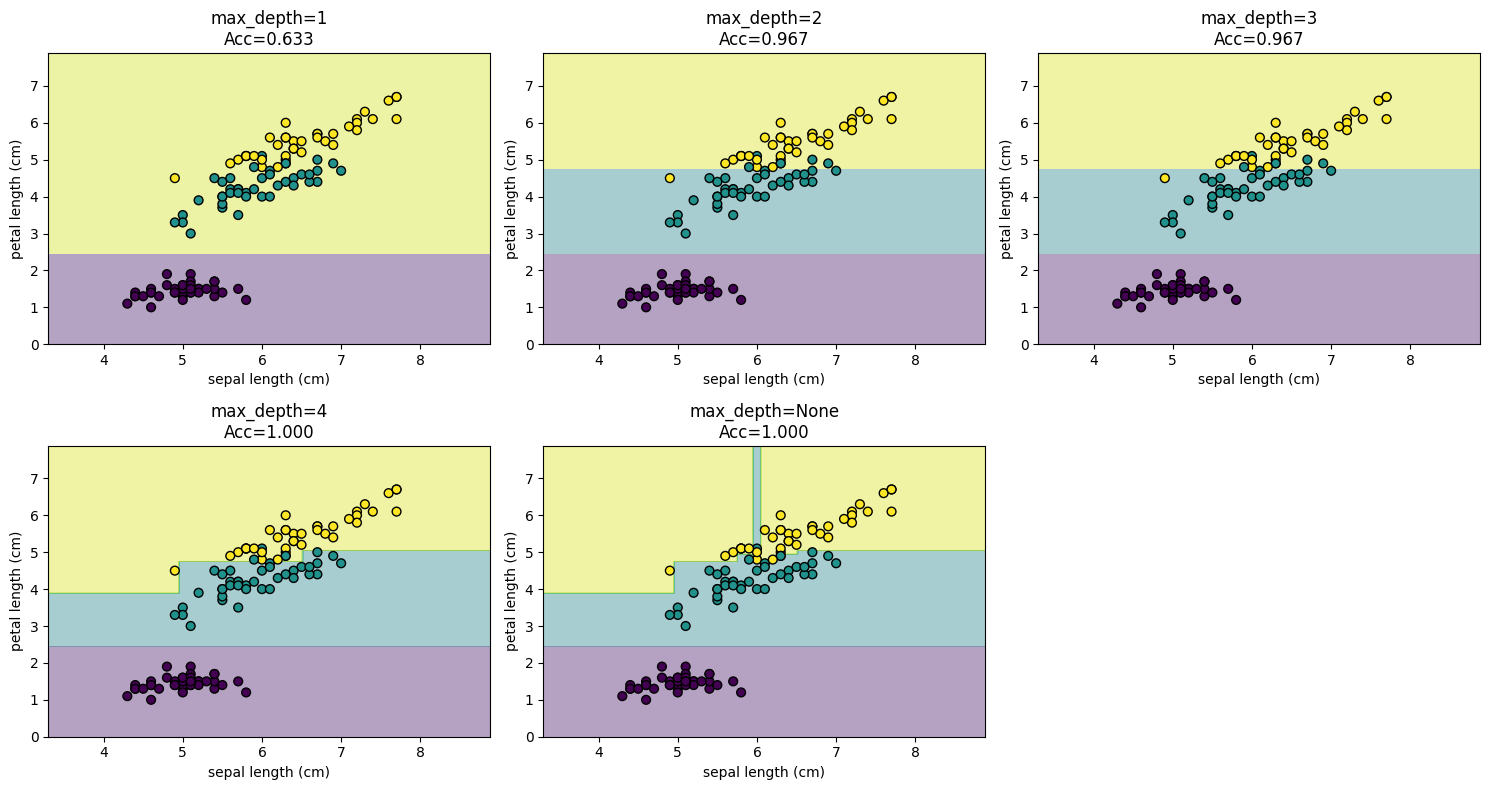

In [256]:
def plot_decision_boundary(ax, max_depth=None):
    
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    
    # Grid bounds
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Predict on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=40)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[2])
    ax.set_title(f"max_depth={max_depth}\nAcc={acc:.3f}")

# Depths to visualize
depths = [1, 2, 3, 4, None]

# Define subplot grid automatically
n_cols = 3
n_rows = int(np.ceil(len(depths) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()

# Plot each depth
for i, depth in enumerate(depths):
    plot_decision_boundary(axes[i], max_depth=depth)

# Remove any empty subplots
for j in range(len(depths), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


From the plots, when the tree depth is too low (e.g., max_depth=1), the model is underfitting — it’s too simple and fails to separate the classes clearly.
When the depth is too high (e.g., max_depth=4 or None), the model becomes overfitting, forming overly complex boundaries that perfectly fit the training data but may not generalize well.
The best performance occurs at a moderate depth (around 2–3), where the model captures class structure accurately without fitting noise.